In [1]:
# ignore_cell
# Setup cell not displayed in doc
# You can safely ignore this cell

# %load_ext lab_black
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-ticks")
%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("svg")

try:
    import pyomeca
except ModuleNotFoundError:
    !pip install -e ..
    from IPython.core.display import HTML
    HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Installation

Before you can use pyomeca, you will need to get it installed.
Pyomeca itself is a pure Python package, but its dependencies are not.
The easiest way to get everything installed is to use [conda](https://conda.io/en/latest/miniconda.html).

To install pyomeca with its recommended dependencies using the conda command line tool:

```bash
conda install -c conda-forge pyomeca
```
Now that you have installed pyomeca, you should be able to import it:

```python
import pyomeca
```

!!! note
    Want to test pyomeca from your browser and without installing anything?
    Try out our binder server: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/romainmartinez/pyomeca/master?filepath=notebooks)

## Quick overview

Here is a short introduction to xarray and pyomeca, geared mainly for new users.
You should be able to follow along and complete this short example in about 10 minutes.

We will carry out common tasks in biomechanics, including reading files, manipulating and processing data, making figures and writing files.

### Object creation

Let's begin by creating a biomechanical data structure with pyomeca.
In this tutorial, we will analyze the skin marker data available in this [`c3d file`](https://github.com/romainmartinez/pyomeca/blob/master/tests/data/markers_analogs.c3d).

Pyomeca provides the `from_c3d` function to read `c3d` files.
As we want to analyse markers data, we will use the `Markers` class:

In [2]:
from pyomeca import Markers

data_path = "../tests/data/markers_analogs.c3d"
markers = Markers.from_c3d(data_path, prefix_delimiter=":")

Make sure to always have a check on the data after reading it.

When used in [Jupyter notebooks](https://jupyter.org/), data can be explored interactively.
A standard text representation is available otherwise.

In [3]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 51, time: 580)>
array([[[  44.16278839,   44.16666412,   44.16487122, ...,
           99.22426605,   99.24201965,   99.25963593],
        [  32.57229614,   32.57104111,   32.56489563, ...,
           87.51286316,   87.52822876,   87.54118347],
        [ -93.72181702,  -93.72447968,  -93.72324371, ...,
          -41.1590271 ,  -41.14812851,  -41.12734985],
        ...,
        [ 562.26068115,  562.41027832,  562.56695557, ...,
          625.63555908,  625.98504639,  626.25811768],
        [ 568.24200439,  568.37792969,  568.49249268, ...,
          624.18139648,  624.51190186,  624.78894043],
        [ 568.44470215,  568.52038574,  568.59216309, ...,
          623.09222412,  623.44036865,  623.75152588]],

       [[-276.86193848, -276.86169434, -276.86407471, ...,
         -259.15292358, -259.16690063, -259.17092896],
        [-243.14048767, -243.14073181, -243.13331604, ...,
         -225.44718933, -225.45556641, -225.46226501],
        [ 124.78598022,  124.78731537,  124.78870392, ...,
          141.820755  ,  141.80741882,  141.80308533],
        ...,
        [ 638.35144043,  638.4241333 ,  638.50653076, ...,
          592.00372314,  592.15686035,  592.27819824],
        [ 626.79144287,  626.86114502,  626.90710449, ...,
          584.15661621,  584.27709961,  584.38830566],
        [ 651.37927246,  651.45532227,  651.49957275, ...,
          610.59655762,  610.72821045,  610.84472656]],

       [[ 675.69683838,  675.69873047,  675.6986084 , ...,
          903.97650146,  903.96801758,  903.980896  ],
        [ 676.57452393,  676.58099365,  676.57720947, ...,
          904.61694336,  904.61645508,  904.63104248],
        [ 674.27874756,  674.27947998,  674.28033447, ...,
          902.77349854,  902.77819824,  902.78143311],
        ...,
        [  81.34425354,   81.32899475,   81.2776413 , ...,
           53.45215607,   53.57727814,   53.72877121],
        [ 110.84020996,  110.81329346,  110.76582336, ...,
           83.92819214,   84.07093048,   84.20204163],
        [ 129.69673157,  129.6789856 ,  129.62939453, ...,
           99.39131165,   99.52735138,   99.68258667]],

       [[   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        ...,
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U14 'gauche_ext' 'gauche_int' ... 'MEDH' 'LATH'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 5.75 5.76 5.77 5.78 5.79
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

In this case, we have generated a 3D array with the `axis`, `channel` and `time` dimensions.

!!! note
    There are several ways to create objects in pyomeca: by supplying data, from files or from other data-structure.
    A more complete guide on object creation is available in the [objection creation](/object-creation) section of the documentation.

In [4]:
# ignore_cell
import xarray as xr
xr.set_options(display_style="text");

### Indexing

Since we have labels associated with each dimension, we have several kinds of indexing available with varying levels of convenience and intuitiveness.
Let's see three ways to get the same data (ninth marker and first time frame).

#### Positional indexing

Indexing directly works just like it does for numpy arrays.

In [5]:
markers[:, 9, 0]

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'ASISl'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

#### Label-based indexing

Label-based indexing frees us from having to know how the data are organized.
We do not have to rely on dimension order and can use them explicitly to index the data.

The `isel` method is used when the dimension lookup is by name and the index lookup is by integer

In [6]:
markers.isel(channel=9, time=0)

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'ASISl'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

The `sel` method is used when the dimension and index lookups are both by name.

In [7]:
markers.sel(channel="ASISl", time=0)

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'ASISl'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

!!! note
    xarray offers extremely flexible indexing routines.
    For more details on indexing see the [xarray documentation](http://xarray.pydata.org/en/stable/indexing.html#indexing).

### Metadata

Biomechanical datasets are usually more than just raw numbers and have various metadata attributes.
Some metadata are already filled by pyomeca and available in the `attrs` Python dictionary.

In [8]:
markers.attrs

{'first_frame': 0, 'last_frame': 579, 'rate': 100.0, 'units': 'mm'}

They can be accessed using the standard dictionary indexing

In [9]:
markers.attrs["rate"]

100.0

Or directly as a propriety

In [10]:
markers.rate

100.0

You can assign anything you wish.

In [11]:
markers.attrs["description"] = "Skin marker positions recorded in Montreal."
markers.attrs["participant_id"] = 12
markers.time.attrs["units"] = "seconds"

In [12]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 51, time: 580)>
array([[[  44.16278839,   44.16666412,   44.16487122, ...,
           99.22426605,   99.24201965,   99.25963593],
        [  32.57229614,   32.57104111,   32.56489563, ...,
           87.51286316,   87.52822876,   87.54118347],
        [ -93.72181702,  -93.72447968,  -93.72324371, ...,
          -41.1590271 ,  -41.14812851,  -41.12734985],
        ...,
        [ 562.26068115,  562.41027832,  562.56695557, ...,
          625.63555908,  625.98504639,  626.25811768],
        [ 568.24200439,  568.37792969,  568.49249268, ...,
          624.18139648,  624.51190186,  624.78894043],
        [ 568.44470215,  568.52038574,  568.59216309, ...,
          623.09222412,  623.44036865,  623.75152588]],

       [[-276.86193848, -276.86169434, -276.86407471, ...,
         -259.15292358, -259.16690063, -259.17092896],
        [-243.14048767, -243.14073181, -243.13331604, ...,
         -225.44718933, -225.45556641, -225.46226501],
        [ 124.78598022,  124.78731537,  124.78870392, ...,
          141.820755  ,  141.80741882,  141.80308533],
        ...,
        [ 638.35144043,  638.4241333 ,  638.50653076, ...,
          592.00372314,  592.15686035,  592.27819824],
        [ 626.79144287,  626.86114502,  626.90710449, ...,
          584.15661621,  584.27709961,  584.38830566],
        [ 651.37927246,  651.45532227,  651.49957275, ...,
          610.59655762,  610.72821045,  610.84472656]],

       [[ 675.69683838,  675.69873047,  675.6986084 , ...,
          903.97650146,  903.96801758,  903.980896  ],
        [ 676.57452393,  676.58099365,  676.57720947, ...,
          904.61694336,  904.61645508,  904.63104248],
        [ 674.27874756,  674.27947998,  674.28033447, ...,
          902.77349854,  902.77819824,  902.78143311],
        ...,
        [  81.34425354,   81.32899475,   81.2776413 , ...,
           53.45215607,   53.57727814,   53.72877121],
        [ 110.84020996,  110.81329346,  110.76582336, ...,
           83.92819214,   84.07093048,   84.20204163],
        [ 129.69673157,  129.6789856 ,  129.62939453, ...,
           99.39131165,   99.52735138,   99.68258667]],

       [[   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        ...,
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U14 'gauche_ext' 'gauche_int' ... 'MEDH' 'LATH'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 5.75 5.76 5.77 5.78 5.79
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

### Computation

#### Arithmetic

As the underlying data-structure is a numpy array, xarray data arrays work the same way you would expect if you are used to numpy.

In [13]:
subset = markers[:, 0, :6]

In [14]:
subset + 10

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[  54.16278839,   54.16666412,   54.16487122,   54.16558075,
          54.17311096,   54.18517685],
       [-266.86193848, -266.86169434, -266.86407471, -266.86123657,
        -266.85812378, -266.85818481],
       [ 685.69683838,  685.69873047,  685.6986084 ,  685.69775391,
         685.7041626 ,  685.69592285],
       [  11.        ,   11.        ,   11.        ,   11.        ,
          11.        ,   11.        ]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

In [15]:
subset.T  # transpose

<xarray.DataArray 'markers' (time: 6, axis: 4)>
array([[  44.16278839, -276.86193848,  675.69683838,    1.        ],
       [  44.16666412, -276.86169434,  675.69873047,    1.        ],
       [  44.16487122, -276.86407471,  675.6986084 ,    1.        ],
       [  44.16558075, -276.86123657,  675.69775391,    1.        ],
       [  44.17311096, -276.85812378,  675.7041626 ,    1.        ],
       [  44.18517685, -276.85818481,  675.69592285,    1.        ]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [16]:
subset.mean()

<xarray.DataArray 'markers' ()>
array(111.00187318)
Coordinates:
    channel  <U14 'gauche_ext'

In [17]:
subset.mean(axis=1)

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16969872, -276.86087545,  675.69866943,    1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'

We can, however, take advantage of the labels instead of axis numbers

In [18]:
subset.mean(dim="time")

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16969872, -276.86087545,  675.69866943,    1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'

Arithmetic operations broadcast based on dimension name. This means you don’t need to insert dummy dimensions for alignment:

In [19]:
only_first_axis = subset.sel(axis="x")
only_first_frame = subset.isel(time=0)

In [20]:
only_first_axis

<xarray.DataArray 'markers' (time: 6)>
array([44.16278839, 44.16666412, 44.16487122, 44.16558075, 44.17311096,
       44.18517685])
Coordinates:
    axis     <U4 'x'
    channel  <U14 'gauche_ext'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [21]:
only_first_frame

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16278839, -276.86193848,  675.69683838,    1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'
    time     float64 0.0
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [22]:
only_first_frame + only_first_axis

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[  88.32557678,   88.32945251,   88.32765961,   88.32836914,
          88.33589935,   88.34796524],
       [-232.69915009, -232.69527435, -232.69706726, -232.69635773,
        -232.68882751, -232.67676163],
       [ 719.85962677,  719.8635025 ,  719.86170959,  719.86241913,
         719.86994934,  719.88201523],
       [  45.16278839,   45.16666412,   45.16487122,   45.16558075,
          45.17311096,   45.18517685]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

Let's compare with the sum made with numpy arrays:

In [23]:
only_first_axis.values + only_first_axis.values

array([88.32557678, 88.33332825, 88.32974243, 88.3311615 , 88.34622192,
       88.3703537 ])

And we do not need to worry about the order of dimensions.

In [24]:
subset - subset.T

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

Whereas this is not possible with numpy arrays:

```
subset.values - subset.values.T
```

```
>> ValueError: operands could not be broadcast together with shapes (4,6) (6,4) 
```

!!! note
    xarray supports powerful shortcuts for computation.
    For more, see the [xarray documentation](http://xarray.pydata.org/en/stable/computation.html#comput).

#### Application: exploring missing values

When we visualize some of our markers, we can realize that there are some missing values.

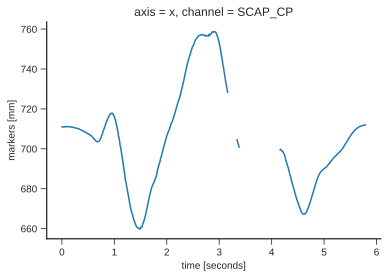

In [25]:
markers.sel(axis="x", channel="SCAP_CP").plot.line(x="time");

Let's investigate those missing values

In [26]:
markers_null_values = markers.sel(axis="x").isnull()
print(f"There are {markers_null_values.sum().values} missing values")

There are 305 missing values


What are the 5 markers with the most missing values?

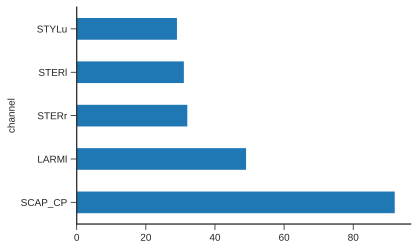

In [27]:
markers_null_values.sum(dim="time").to_series().nlargest(5).plot.barh();

The cumulative number of missing values can tell us when marker occlusions occur.

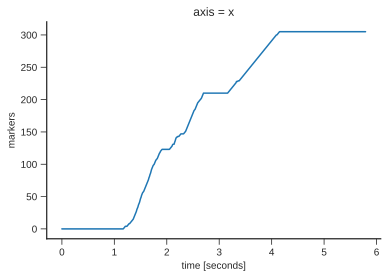

In [28]:
markers_null_values.sum("channel").cumsum("time").plot();

Now that we know more about the missing values, we can use xarray for filling missing values via 1D interpolation.

In [29]:
markers_without_null = markers.interpolate_na(dim="time", method="cubic")

Now, let's visualize our interpolated markers.

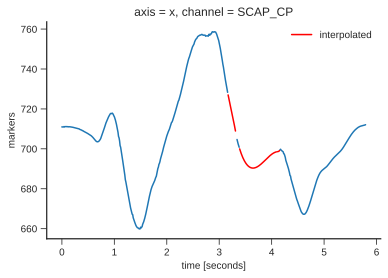

In [30]:
import matplotlib.pyplot as plt

markers.sel(axis="x", channel="SCAP_CP").plot.line(x="time")
(
    markers_without_null.where(markers.isnull())
    .sel(axis="x", channel="SCAP_CP")
    .plot.line(x="time", label="interpolated", color="r")
)
plt.legend();

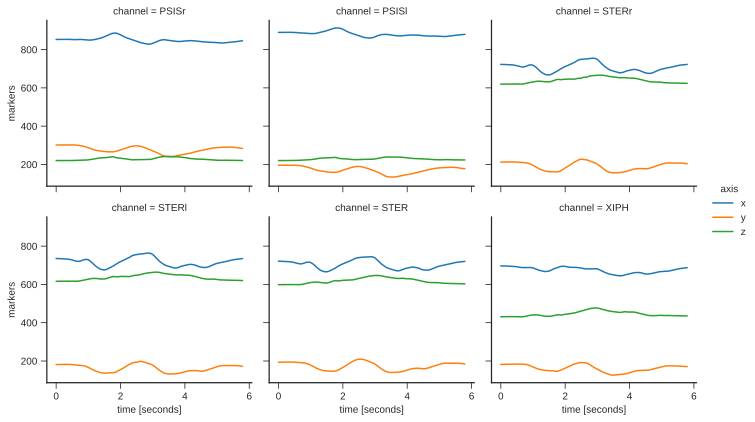

In [31]:
(
    markers_without_null.drop_sel(axis="ones")  # drop the axis with only ones
    .isel(channel=slice(10, 16))  # select some markers
    .plot.line(x="time", col="channel", hue="axis", col_wrap=3)  # plot the data
);

#### Application: electromyographic pipeline

Pyomeca implements specialized functionalities commonly used in biomechanics.

As an example, let's process the electromyographic data contained in our `c3d` file.

In [32]:
from pyomeca import Analogs

muscles = [
    "Delt_ant",
    "Delt_med",
    "Delt_post",
    "Supra",
    "Infra",
    "Subscap",
]
emg = Analogs.from_c3d(data_path, suffix_delimiter=".", usecols=muscles)

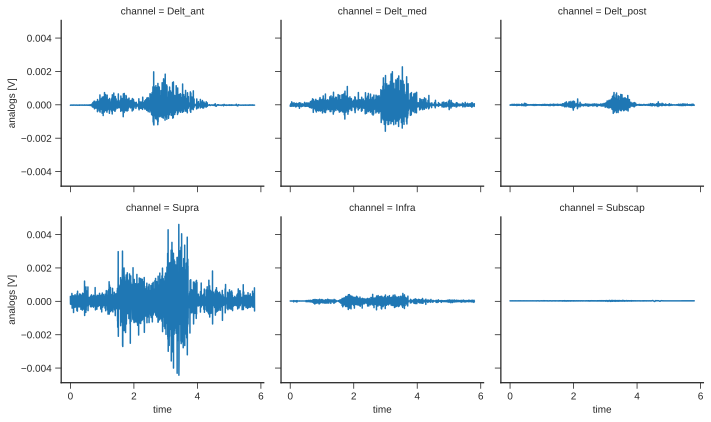

In [33]:
emg.plot(x="time", col="channel", col_wrap=3);

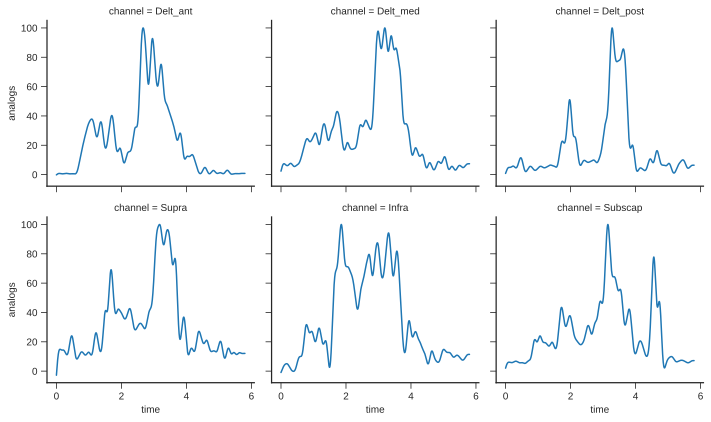

In [34]:
emg_processed = (
    emg.meca.band_pass(freq=emg.rate, order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(freq=emg.rate, order=4, cutoff=5)
    .meca.normalize()
)

emg_processed.plot(x="time", col="channel", col_wrap=3);

By updating the metadata (`attrs` dictionary), we can update the name and units on our plots.

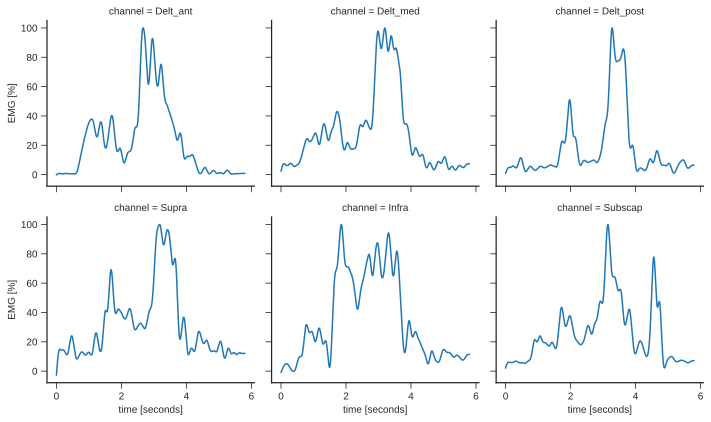

In [35]:
emg_processed.name = "EMG"
emg_processed.attrs["units"] = "%"
emg_processed.time.attrs["units"] = "seconds"

emg_processed.plot(x="time", col="channel", col_wrap=3);

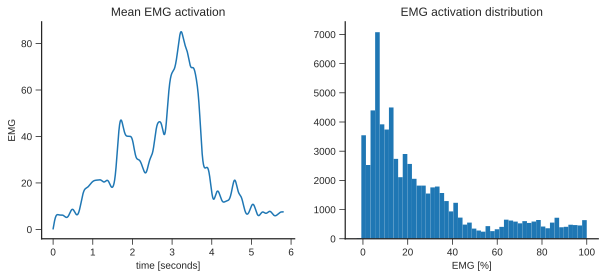

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution");

By converting the data array to a pandas dataframe, we can further extend the possibilities:

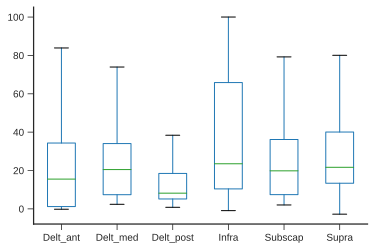

In [37]:
emg_dataframe = emg_processed.meca.to_wide_dataframe()
emg_dataframe.plot.box(showfliers=False);

In [38]:
emg_dataframe.corr().style.background_gradient().set_precision(2)

!!! note
    For more details, see the [data processing](/data-processing/) section of the documentation.

### Datasets

Datasets are a useful xarray feature to store multiple data arrays with common dimensions

In [39]:
import xarray as xr
import numpy as np

In [40]:
trials = xr.Dataset(
    {
        "trial 1": emg,
        "trial 2": emg * np.random.rand(),
        "trial 3": emg * np.random.rand(),
    }
)
trials

<xarray.Dataset>
Dimensions:  (channel: 6, time: 11600)
Coordinates:
  * channel  (channel) <U9 'Delt_ant' 'Delt_med' ... 'Infra' 'Subscap'
  * time     (time) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.798 5.799 5.8
Data variables:
    trial 1  (channel, time) float64 -2.609e-05 -2.544e-05 ... 3.04e-05
    trial 2  (channel, time) float64 -5.21e-06 -5.081e-06 ... 6.071e-06
    trial 3  (channel, time) float64 -1.355e-05 -1.321e-05 ... 1.578e-05

We can still access the individual data arrays

In [41]:
trials["trial 1"]

<xarray.DataArray 'trial 1' (channel: 6, time: 11600)>
array([[-2.60891229e-05, -2.54411752e-05, -2.45576939e-05, ...,
        -1.93931046e-05, -1.97550762e-05, -1.91258678e-05],
       [-4.02107289e-05, -6.80835801e-05, -8.64052563e-05, ...,
         4.98310801e-05,  4.22991216e-05,  3.81295613e-05],
       [-1.36110339e-05, -1.32793148e-05, -1.27393068e-05, ...,
        -2.54613460e-05, -2.30687110e-05, -1.89858001e-05],
       [ 2.97530321e-04,  1.55170274e-04,  3.52776406e-05, ...,
        -2.58133630e-04, -4.46292252e-04, -5.75785409e-04],
       [ 2.23239495e-05,  2.26500360e-05,  2.28447316e-05, ...,
         8.95366975e-06, -3.41701161e-06,  1.05170475e-05],
       [ 2.87022194e-05,  2.90283060e-05,  2.90723892e-05, ...,
         2.92962086e-05,  2.90890512e-05,  3.03986035e-05]])
Coordinates:
  * channel  (channel) <U9 'Delt_ant' 'Delt_med' ... 'Infra' 'Subscap'
  * time     (time) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.798 5.799 5.8
Attributes:
    first_frame:  0
    last_frame:   11580
    rate:         2000.0
    units:        V

While being able to do indexing and computation on the whole dataset

In [42]:
trials.sel(channel="Infra") + 100

<xarray.Dataset>
Dimensions:  (time: 11600)
Coordinates:
    channel  <U9 'Infra'
  * time     (time) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.798 5.799 5.8
Data variables:
    trial 1  (time) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    trial 2  (time) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    trial 3  (time) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0

!!! note
    If you are processing large amount of data, you can leverage [Dask](https://dask.org/) to support parallel computations.
    Dask divides large amount of data into manageable chunks and represents parallel computations with task graphs that are executed either on your laptop or on a large cluster of machines.
    Xarray has built-in support for dask on both `DataArray` and `Dataset`.
    To see examples and use cases, check out the [xarray documentation](http://xarray.pydata.org/en/stable/dask.html).

### File IO

NetCDF is the recommended file format to save and share xarray objects.

In [43]:
emg.to_netcdf("emg.nc")

In [44]:
xr.open_dataarray("emg.nc")

<xarray.DataArray 'analogs' (channel: 6, time: 11600)>
array([[-2.608912e-05, -2.544118e-05, -2.455769e-05, ..., -1.939310e-05,
        -1.975508e-05, -1.912587e-05],
       [-4.021073e-05, -6.808358e-05, -8.640526e-05, ...,  4.983108e-05,
         4.229912e-05,  3.812956e-05],
       [-1.361103e-05, -1.327931e-05, -1.273931e-05, ..., -2.546135e-05,
        -2.306871e-05, -1.898580e-05],
       [ 2.975303e-04,  1.551703e-04,  3.527764e-05, ..., -2.581336e-04,
        -4.462923e-04, -5.757854e-04],
       [ 2.232395e-05,  2.265004e-05,  2.284473e-05, ...,  8.953670e-06,
        -3.417012e-06,  1.051705e-05],
       [ 2.870222e-05,  2.902831e-05,  2.907239e-05, ...,  2.929621e-05,
         2.908905e-05,  3.039860e-05]])
Coordinates:
  * time     (time) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.798 5.799 5.8
  * channel  (channel) object 'Delt_ant' 'Delt_med' ... 'Infra' 'Subscap'
Attributes:
    first_frame:  0
    last_frame:   11580
    rate:         2000.0
    units:        V

In [45]:
trials.to_netcdf("trials.nc")

In [46]:
xr.open_dataset("trials.nc")

<xarray.Dataset>
Dimensions:  (channel: 6, time: 11600)
Coordinates:
  * time     (time) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.798 5.799 5.8
  * channel  (channel) object 'Delt_ant' 'Delt_med' ... 'Infra' 'Subscap'
Data variables:
    trial 1  (channel, time) float64 ...
    trial 2  (channel, time) float64 ...
    trial 3  (channel, time) float64 ...

Pyomeca implements function to read various file format commonly used in biomechanics such as `c3d`, `csv`, `xlsx`, `sto`, `trc` and `mot`.

Users can also write Matlab and csv files.

In [47]:
emg.meca.to_matlab("emg.mat")

In [48]:
emg.meca.to_csv("emg.csv")

In [49]:
# ignore_cell
from pathlib import Path

files = ["emg.mat", "emg.csv", "emg.nc", "trials.nc"]

for file in files:
    Path(file).unlink()